In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated or loaded data (replace with real stock data if needed)
# For example, use: pd.read_csv('your_stock_data.csv')
dates = pd.date_range(start='2023-01-01', periods=30)
prices = [100 + np.sin(i / 2) * 5 + i * 0.5 for i in range(30)]  # Simulated data
df = pd.DataFrame({'Date': dates, 'Close': prices})
df.set_index('Date', inplace=True)

In [2]:
# 1. Compute Simple Moving Average (SMA)
window_size = 5
df['SMA'] = df['Close'].rolling(window=window_size).mean()

In [3]:
# 2. Upward/Downward Runs
runs = []
current_run = {'type': None, 'length': 0}
up_runs = []
down_runs = []
for i in range(1, len(df)):
    if df['Close'].iloc[i] > df['Close'].iloc[i - 1]:
        run_type = 'up'
    elif df['Close'].iloc[i] < df['Close'].iloc[i - 1]:
        run_type = 'down'
    else:
        run_type = 'none'

    if run_type == current_run['type']:
        current_run['length'] += 1
    else:
        if current_run['type'] == 'up':
            up_runs.append(current_run['length'])
        elif current_run['type'] == 'down':
            down_runs.append(current_run['length'])
        current_run = {'type': run_type, 'length': 1 if run_type != 'none' else 0}

# Append the last run
if current_run['type'] == 'up':
    up_runs.append(current_run['length'])
elif current_run['type'] == 'down':
    down_runs.append(current_run['length'])

df['Upward Runs'] = len(up_runs)
df['Downward Runs'] = len(down_runs)
longest_up_run = max(up_runs) if up_runs else 0
longest_down_run = max(down_runs) if down_runs else 0

In [4]:
# 3. Daily Returns
df['Daily Return'] = df['Close'].pct_change()

In [5]:
# 4. Max Profit - Best Time to Buy and Sell Stock
min_price = float('inf')
max_profit = 0
buy_day = sell_day = 0

for i in range(len(df)):
    price = df['Close'].iloc[i]
    if price < min_price:
        min_price = price
        temp_buy_day = i
    elif price - min_price > max_profit:
        max_profit = price - min_price
        buy_day = temp_buy_day
        sell_day = i

buy_date = df.index[buy_day]
sell_date = df.index[sell_day]
print(buy_date)
print(sell_date)

2023-01-10 00:00:00
2023-01-30 00:00:00


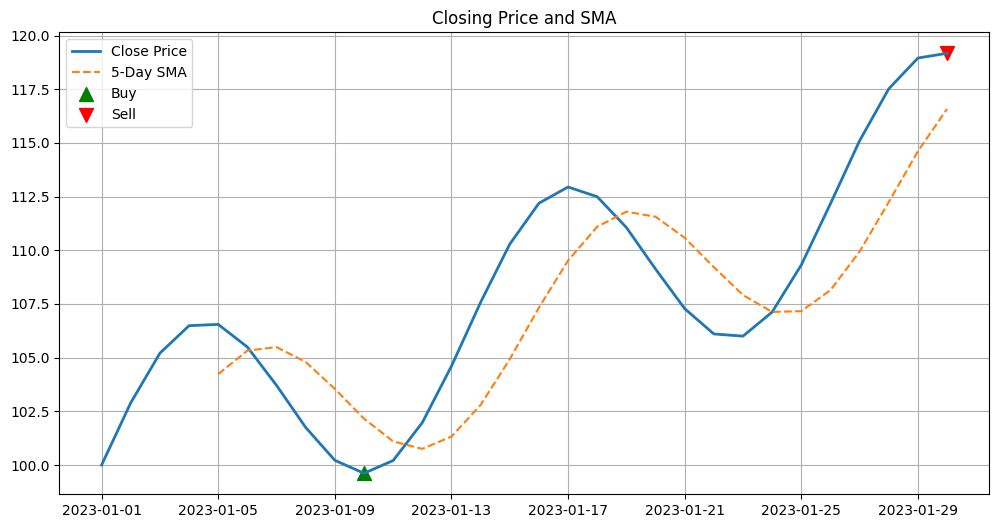

In [6]:
# 5. Plot Closing Price vs SMA
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', linewidth=2)
plt.plot(df['SMA'], label=f'{window_size}-Day SMA', linestyle='--')
plt.scatter(df.index[buy_day], df['Close'].iloc[buy_day], color='green', label='Buy', marker='^', s=100)
plt.scatter(df.index[sell_day], df['Close'].iloc[sell_day], color='red', label='Sell', marker='v', s=100)
plt.title('Closing Price and SMA')
plt.legend()
plt.grid(True)
plt.show()

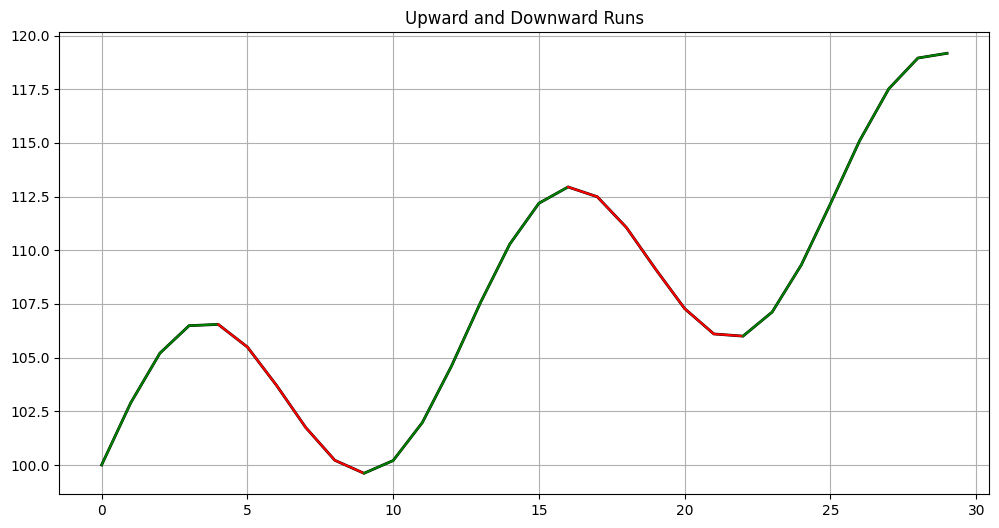

In [7]:
# 6. Highlight upward and downward runs
colors = []
for i in range(1, len(df)):
    if df['Close'].iloc[i] > df['Close'].iloc[i - 1]:
        colors.append('green')
    elif df['Close'].iloc[i] < df['Close'].iloc[i - 1]:
        colors.append('red')
    else:
        colors.append('gray')
plt.figure(figsize=(12, 6))
plt.plot(df['Close'].values, color='black', linewidth=2, label='Close Price')
for i in range(1, len(df)):
    plt.plot([i - 1, i], df['Close'].values[i - 1:i + 1], color=colors[i - 1])
plt.title('Upward and Downward Runs')
plt.grid(True)
plt.show()

In [8]:
# 7. Test Case Validation
test_data = pd.DataFrame({
    'Close': [100, 102, 104, 103, 101, 105, 107, 110, 108, 106]
})
test_data['SMA'] = test_data['Close'].rolling(window=3).mean()
test_data['Daily Return'] = test_data['Close'].pct_change()

print("\nSample Test Data SMA and Daily Returns:")
print(test_data.round(2))

print(f"\nLongest Upward Run: {longest_up_run} days")
print(f"Longest Downward Run: {longest_down_run} days")
print(f"Max Profit: ${max_profit:.2f} (Buy: {buy_date.date()}, Sell: {sell_date.date()})")


Sample Test Data SMA and Daily Returns:
   Close     SMA  Daily Return
0    100     NaN           NaN
1    102     NaN          0.02
2    104  102.00          0.02
3    103  103.00         -0.01
4    101  102.67         -0.02
5    105  103.00          0.04
6    107  104.33          0.02
7    110  107.33          0.03
8    108  108.33         -0.02
9    106  108.00         -0.02

Longest Upward Run: 7 days
Longest Downward Run: 6 days
Max Profit: $19.56 (Buy: 2023-01-10, Sell: 2023-01-30)
